In [14]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import ascii
import os
import likelihood 
LK = likelihood.LK()
import corner

In [2]:
data = ascii.read('Binned_data/lcparam_DS17f.txt', names=['name', 'zcmb', 'zhel', 'dz', 
                                                          'mb', 'dmb', 'x1', 'dx1', 
                                                          'color', 'dcolor', '3rdvar', 'd3rdvar', 
                                                          'cov_m_s', 'cov_m_c', 'cov_s_c', 'set', 
                                                          'ra', 'dec'])
stat_err = data['zcmb']

In [3]:
data

name,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,3rdvar,d3rdvar,cov_m_s,cov_m_c,cov_s_c,set,ra,dec
int64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
0,0.014,0.014,0.0,14.57001926,0.0311,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0194,0.0194,0.0,15.2279603507,0.02645,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0264,0.0264,0.0,15.934102317,0.0231,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0329,0.0329,0.0,16.4217829558,0.0235,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0396,0.0396,0.0,16.836418956,0.02845,0,0,0,0,0,0,0,0,0,0,0,0
5,0.0475,0.0475,0.0,17.2346439906,0.0334,0,0,0,0,0,0,0,0,0,0,0,0
6,0.056,0.056,0.0,17.5758459622,0.03215,0,0,0,0,0,0,0,0,0,0,0,0
7,0.064,0.064,0.0,17.9104543501,0.0439,0,0,0,0,0,0,0,0,0,0,0,0
8,0.0721,0.0721,0.0,18.1780074589,0.03865,0,0,0,0,0,0,0,0,0,0,0,0


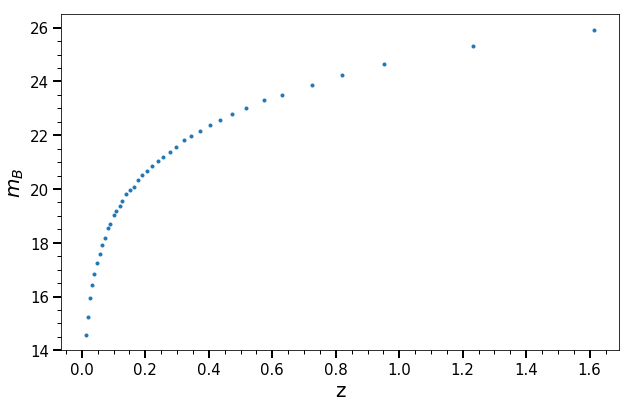

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,6.18))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
params = {'legend.fontsize': 12,
          'figure.figsize': (15, 5),
         'axes.labelsize': 15,
         'axes.titlesize':20,
         'xtick.labelsize':10,
         'ytick.labelsize':10,
         'ytick.major.size': 5.5,
         'axes.linewidth': 2}
plt.rcParams.update(params)
axs.plot(data['zcmb'],data['mb'],'.')
axs.set_xlabel('z', size=20)
axs.set_ylabel(r'$m_B$', size=20)
#axs.set_xscale('log')
axs.minorticks_on()
axs.tick_params(axis = 'both', which = 'major', labelsize = 15, length = 8, width = 2)
axs.tick_params(axis = 'both', which = 'minor', labelsize = 12, length = 4, width = 1)
#axs.grid(True)

In [5]:
sys_error = ascii.read('Binned_data/sys_DS17f.txt')
sys_error = sys_error['40']

In [6]:
files = open("Binned_data/sys_DS17f.txt")
lines = files.readlines()
files.close()

array = []
cnt = 0 
line = []

for i in np.arange(np.size(sys_error)):
    cnt += 1
    #print(cnt)
    line.append(sys_error[i])
    if cnt % 40 == 0:
        cnt = 0
        if len(line) > 0:
            array.append(line)
        line = []
        
#print(array)

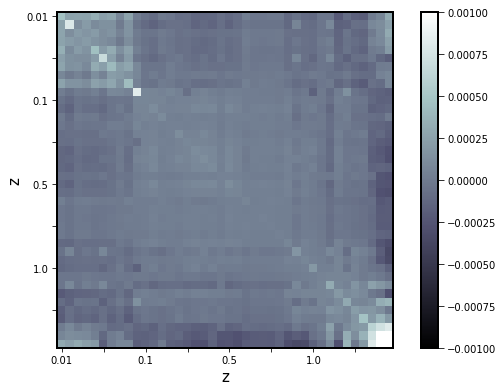

In [7]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,6.18))
imgplot = plt.imshow(array, cmap='bone', vmin=-0.001, vmax=0.001)   
ax1.set_xticklabels(['', 0.01,'',0.1,'',.50,'',1.0,'',10.0])
ax1.set_yticklabels(['', 0.01,'',0.1,'',.50,'',1.0,'',2.0])
ax1.set_xlabel('z')
ax1.set_ylabel('z')
plt.colorbar()

In [8]:
import likelihood 
LK = likelihood.LK()

In [9]:
pars = {'Omega_m': 0.30, 'Omega_lambda': 0.7, 'H0': 73.0, 'M_nuisance': -19.0, 'Omega_k': 0.0}
pars.update({'Omega_k': 0.1})

In [10]:
def simulator():
    pars = {'Omega_m': abs(np.random.normal(0.3,0.1,1)[0]), 
                'Omega_lambda': abs(np.random.normal(0.7,0.2,1)[0]), 
                'H0': np.random.normal(70,5,1)[0], 
                'M_nuisance': np.random.normal(-19,1,1)[0]}
    return pars

In [11]:
parameters = []
prob = []
for i in np.arange(5000):
    _pars = simulator()
    _loglk, pars = LK.likelihood_cal(_pars, ifsys=False)
    parameters.append(list(pars.values()))
    prob.append(_loglk)
parameters = np.array(parameters)

/Users/yize/Documents/jupyter/phy250/Bayesian-Inference-Group-Project/likelihood.py:223: RuntimeWarning: invalid value encountered in sqrt
  return 1/np.sqrt(sum)
/Users/yize/Documents/jupyter/phy250/Bayesian-Inference-Group-Project/likelihood.py:246: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_val += quad(self.integrand, self.z[i-1], self.z[i], args=(pars,))[0]


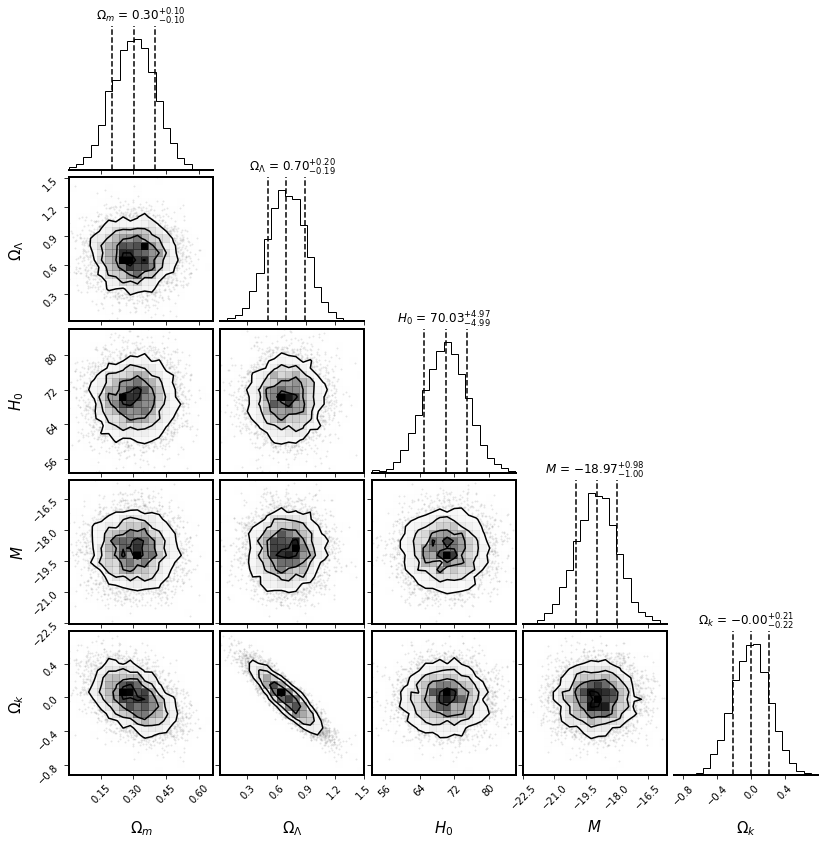

In [15]:
figure = corner.corner(parameters, labels=[r"$\Omega_m$", r"$\Omega_{\Lambda}$", r"$H_0$", r"$M$", r"$\Omega_k$"],
                       color='k', quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})
corner_axes = np.array(figure.get_axes()).reshape(5, 5)
for ax in np.diag(corner_axes):
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('none')

In [16]:
pars = {'Omega_m': 0.30, 'Omega_lambda': 0.7, 'H0': 74.0, 'M_nuisance': -19.23}#, 'Omega_k': 0.03
i=0
nx=100
ny=100
loglk=np.zeros((nx,ny))
omega_m = np.linspace(0,1.6,nx)
omega_lambda = np.linspace(0,2.5,ny)
par_record = []
for _omega_m in omega_m:
    j=0
    pars.update({'Omega_m': _omega_m})
    for _omega_lambda in omega_lambda:
        pars.update({'Omega_lambda': _omega_lambda})
        _loglk, _pars = LK.likelihood_cal(pars=pars, ifsys=True)
        #pars = {'Omega_m': 0.30, 'Omega_lambda': 0.7, 'H0': 74.0, 'M_nuisance': -19.23}
        par_record.append(_pars)
        try:
            loglk[i, j] = _loglk
        except IndexError:
            print (i, j)
        j+=1
    i+=1

/Users/yize/Documents/jupyter/phy250/Bayesian-Inference-Group-Project/likelihood.py:223: RuntimeWarning: invalid value encountered in sqrt
  return 1/np.sqrt(sum)
/Users/yize/Documents/jupyter/phy250/Bayesian-Inference-Group-Project/likelihood.py:246: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_val += quad(self.integrand, self.z[i-1], self.z[i], args=(pars,))[0]
/Users/yize/Documents/jupyter/phy250/Bayesian-Inference-Group-Project/likelihood.py:195: RuntimeWarning: invalid value encountered in log10
  mus = 25 + 5*np.log10(lds)


In [17]:
pars = {'Omega_m': 0.30, 'Omega_lambda': 1.7, 'H0': 74.0, 'M_nuisance': -19.23}
LK.likelihood_cal(pars=pars, ifsys=True)

(-5000000000.0,
 {'Omega_m': 0.3,
  'Omega_lambda': 1.7,
  'H0': 74.0,
  'M_nuisance': -19.23,
  'Omega_k': -1.0})

In [18]:
prob = np.exp(-np.log10(-loglk))
print (np.sum(prob))
prob = prob/np.sum(prob)
prob

704.1459063677213


array([[1.39727272e-04, 1.46733622e-04, 1.54528007e-04, ...,
        8.71220705e-08, 8.71220705e-08, 8.71220705e-08],
       [1.35489967e-04, 1.42046405e-04, 1.49324757e-04, ...,
        8.71220705e-08, 8.71220705e-08, 8.71220705e-08],
       [1.31502902e-04, 1.37643728e-04, 1.44444875e-04, ...,
        8.71220705e-08, 8.71220705e-08, 8.71220705e-08],
       ...,
       [4.19598738e-05, 4.22955088e-05, 4.26383788e-05, ...,
        9.52376228e-05, 9.22523035e-05, 8.93350998e-05],
       [4.17316537e-05, 4.20621620e-05, 4.23997295e-05, ...,
        9.65004121e-05, 9.35227896e-05, 9.06044427e-05],
       [4.15068734e-05, 4.18323764e-05, 4.21647687e-05, ...,
        9.77139161e-05, 9.47530781e-05, 9.18413740e-05]])

/Users/yize/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:942: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


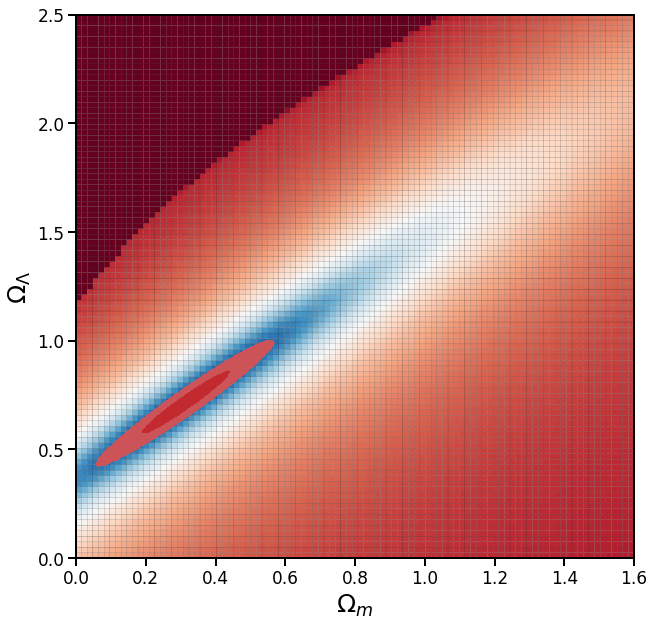

In [19]:
import matplotlib.cm as cm
params = {'legend.fontsize': 16,
          'figure.figsize': (15, 5),
         'axes.labelsize': 17,
         'axes.titlesize':20,
         'xtick.labelsize':10,
         'ytick.labelsize':10,
         'ytick.major.size': 5.5,
         'axes.linewidth': 2}
plt.rcParams.update(params)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig, axs = plt.subplots(1, 1, figsize=(10,10))

ax = axs
c = ax.pcolor(omega_m, omega_lambda, np.transpose(prob), cmap='RdBu', 
              vmin=prob.min(), vmax=prob.max(),edgecolors='k', linewidths=0.1)
#c = ax.imshow(np.flipud(prob), interpolation='bilinear', origin='lower', vmin=prob.min(), vmax=prob.max(),
#                 extent=(omega_m.min(),omega_m.max(),omega_lambda.min(),omega_lambda.max()),cmap=cm.Greys)
ax.contourf(omega_m, omega_lambda, np.transpose(prob), levels=[3.4e-4,3.75e-4,0.02],
                 origin='lower', colors=[(0.80078125, 0.328125 , 0.34765625), (0.76171875, 0.1640625 , 0.18359375)],
                 linewidths=2) # The value of level is just for test!
#ax.clabel(cs, inline=1, fontsize=10)
#ax.set_title('E_M')
ax.set_xlabel(r"$\Omega_m$", size=25)
ax.set_ylabel(r"$\Omega_{\Lambda}$", size=25)
#"ax.set_xlim(10,24)
#clb = fig.colorbar(c, ax=ax)
#clb.ax.tick_params(labelsize=15) 
#clb.ax.get_yaxis().labelpad = 25
#clb.ax.set_ylabel(r'$e^{-log(\chi^2)}$', rotation=270, size=25)
#ax.contour(M, E, np.transpose(M_E_norm), 10, colors='k')
#ax.contour(M, E, gaussian_filter(np.transpose(M_E_norm), 1), 9, colors='k',interpolation='yes')
#ax.minorticks_on()
#""" mark the best value. do it after you know that the best value is!
#ax.plot(13+0.25,0.524+0.02352941/2,'X',markersize=10, color = colors[2])
#"""
ax.tick_params(axis = 'both', which = 'major', labelsize = 17, length = 8, width = 2)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12, length = 4, width = 1)
plt.show()

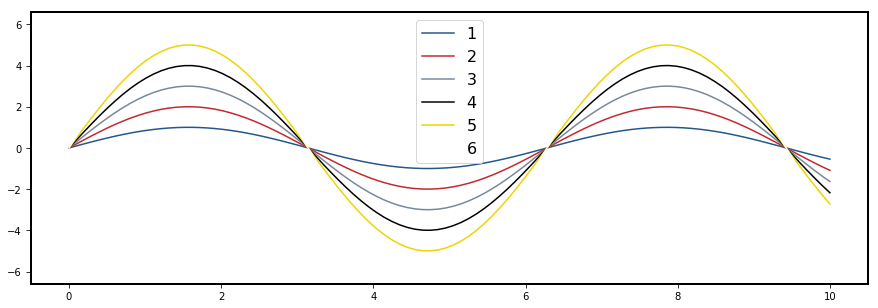

In [20]:
colors=['#235789','#C1292E','#778899','#020100','#F1D302','#FDFFFC']
for i in [1,2,3,4,5,6]:
    plt.plot(np.linspace(0,10,100), i*np.sin(np.linspace(0,10,100)), color=colors[i-1], label=str(i))
plt.legend()

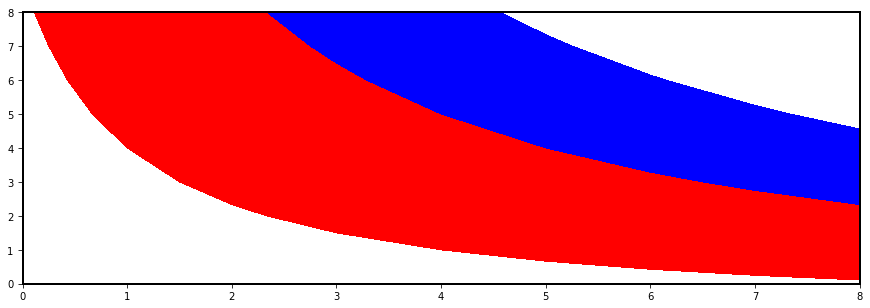

In [21]:
x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x * y

cs = plt.contourf(h, levels=[10, 30, 50],
    colors=['red','blue','black'])
cs.changed()

In [22]:
np.sum(prob)

1.0000000000000002

In [23]:
np.array([129,120,137])/256

array([0.50390625, 0.46875   , 0.53515625])

In [24]:
(0.50390625, 0.46875   , 0.53515625),

((0.50390625, 0.46875, 0.53515625),)